# Theme Flavors

In [1]:
from IPython.display import Image
import pandas as pd

from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Flavors Demonstration

In [4]:
p = ggplot(mpg_df, aes("cty","hwy", color='drv')) + \
    geom_point(tooltips=layer_tooltips().line('@manufacturer @model'))

In [5]:
p2 = p + facet_grid(y="drv")

In [6]:
def theme_with_flavor(plot, theme, title):
    return gggrid([
        plot + theme + ggtitle(title),
        plot + theme + flavor_darcula()+ ggtitle("darcula"),
        plot + theme + flavor_solarized_light()+ ggtitle("solarized_light"),
        plot + theme + flavor_solarized_dark()+ ggtitle("solarized_dark"),
        plot + theme + flavor_high_contrast_light() + ggtitle("high_contrast_light"),
        plot + theme + flavor_high_contrast_dark() + ggtitle("high_contrast_dark"),
    ], ncol=2) + ggsize(800, 800)

In [7]:
theme_with_flavor(p, theme_minimal2(), "minimal2")

In [8]:
theme_with_flavor(p2, theme_minimal2(), "minimal2 + facet_grid")

In [9]:
theme_with_flavor(p, theme_minimal(), "minimal")

In [10]:
theme_with_flavor(p2, theme_minimal(), "minimal + facet_grid")

In [11]:
theme_with_flavor(p, theme_classic(), "classic")

In [12]:
theme_with_flavor(p2, theme_classic(), "classic + facet_grid")

In [13]:
theme_with_flavor(p, theme_light(), "light")

In [14]:
theme_with_flavor(p2, theme_light(), "light + facet_grid")

In [15]:
theme_with_flavor(p, theme_grey(), "grey")

In [16]:
theme_with_flavor(p2, theme_grey(), "grey + facet_grid")

In [17]:
theme_with_flavor(p, theme_void(), "void")

In [18]:
theme_with_flavor(p2, theme_void(), "void + facet_grid")

In [19]:
theme_with_flavor(p, theme_none(), "none")

In [20]:
theme_with_flavor(p2, theme_none(), "none + facet_grid")

In [21]:
theme_with_flavor(p, theme_bw(), "bw")

In [22]:
theme_with_flavor(p2, theme_bw(), "bw + facet_grid")

## Returning to the Theme Defaults with `flavor_standard()`

Use `flavor_standard()` to override other flavors or to make defaults explicit.

In [23]:
# A reusable style layer for consistent plots across the project.

proj_theme = (
    theme_classic() +
    theme(
        axis_title=element_text(size=13),
        axis_text=element_text(size=15),
        legend_position="left",
        axis_ticks_length=7,
        panel_grid_major=element_line(color="spring_green"),
        panel_grid_minor=element_blank()
    ) + flavor_darcula()
)

LetsPlot.set_theme(proj_theme)

In [24]:
# A base plot with the common project style

proj_plot = ggplot(mpg_df, aes("cty","hwy", color='drv')) + \
    geom_point(tooltips=layer_tooltips().line('@manufacturer @model')) + \
    ggtitle("Fuel Economy: City and Highway Mileage by Drive Type")
proj_plot

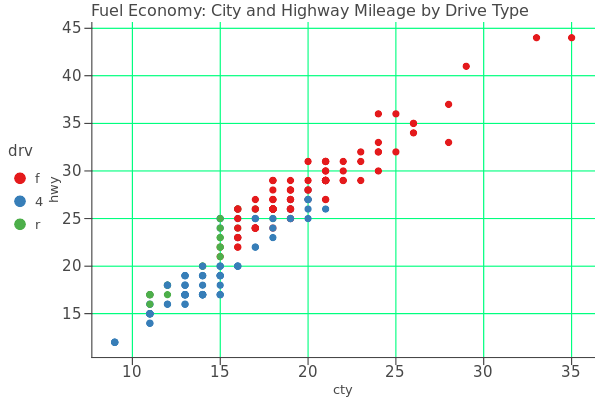

In [25]:
# To restore the theme defaults without affecting other settings, apply flavor_standard(). 
# This can be useful, for example, when exporting the plot for printing.

fullpath_png = ggsave(proj_plot + flavor_standard(), "plot_without_flavor.png", scale=1)

Image(filename=fullpath_png)